# Import neccessary library

In [2]:
import sys
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join
from utils import *


if cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

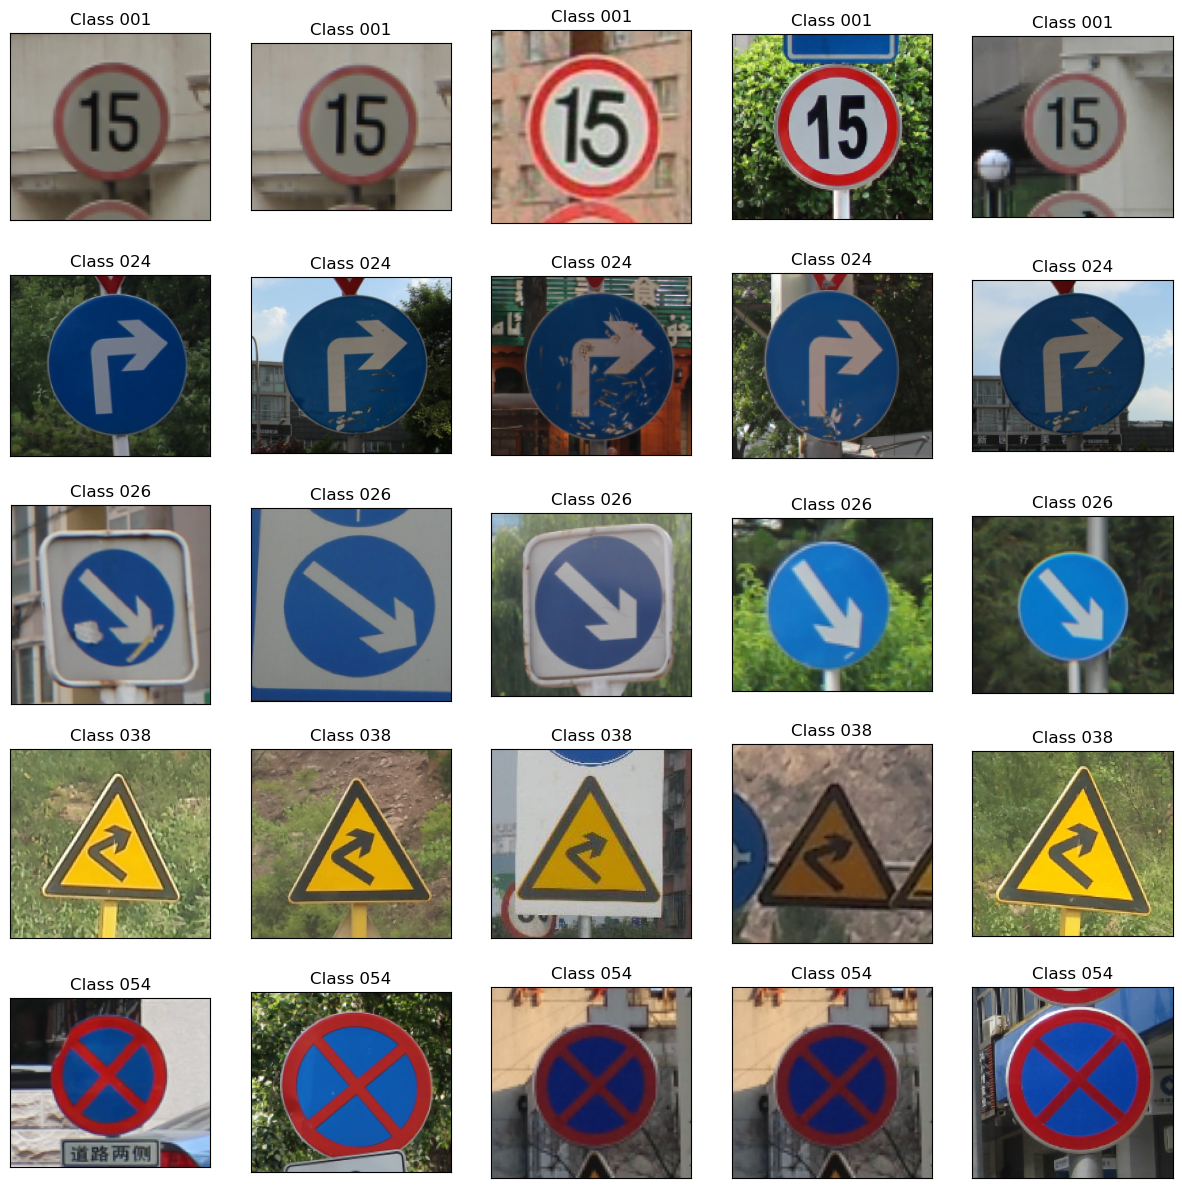

In [68]:
# Read all the images in the folder
images = os.listdir("tsrd-train")

# Define the class labels to display
class_labels = ['001', '024', '026', '038', '054']

# Function to filter images by class
def filter_images_by_class(images, class_label):
    return [img for img in images if img.startswith(class_label)]

# Prepare images and titles for display
display_images_list = []
titles = []
for class_label in class_labels:
    class_images = filter_images_by_class(images, class_label)
    if len(class_images) > 0:
        selected_images = np.random.choice(class_images, min(len(class_images), 5), replace=False)
        for img_name in selected_images:
            img_path = os.path.join(dataset_path, img_name)
            image = cv.imread(img_path)
            if image is not None:
                image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
                display_images_list.append(image_rgb)
                titles.append(f'Class {class_label}')

# Display the images using matplotlib
plt.figure(figsize=(15, 15))
for i, image_rgb in enumerate(display_images_list):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_rgb)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Removing axes

plt.show()
